In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
## 학습시간 대비 합격 데이터
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [4]:
#np.hstack 열추가
X = np.hstack( (pass_time, fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [7]:
y1 = [1]*len(pass_time)
y0 = [0]*len(fail_time)
y = np.hstack((y1, y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Pass rate')

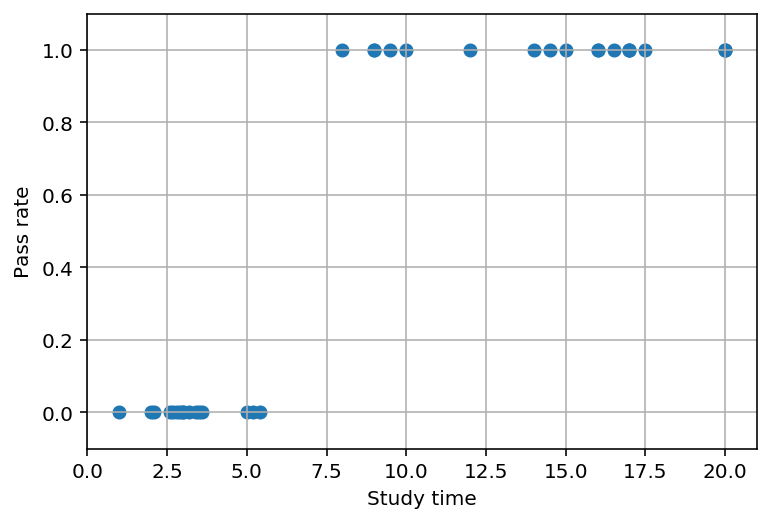

In [8]:
#시각화
plt.scatter(X, y)
plt.grid(True)

plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")

In [9]:
#모델 학습
model = LogisticRegression()
model.fit(X.reshape(-1, 1), y)

model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [10]:
# 예측 분류
model.predict([[6.9]])

array([0])

In [13]:
#예측 확률
model.predict_proba([[6.9]])

array([[0.50294437, 0.49705563]])

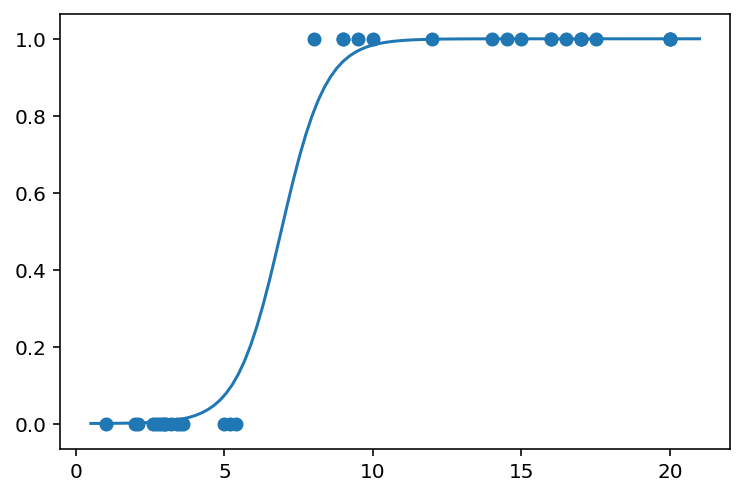

In [14]:
# 결과 시각화
def logreg(z):
    return 1/ (1+ np.exp(-z))

plt.scatter(X, y)

xx = np.linspace(0.5, 21, 100)
yy = logreg(model.coef_ * xx + model.intercept_)
yy[0]
plt.plot(xx, yy[0])

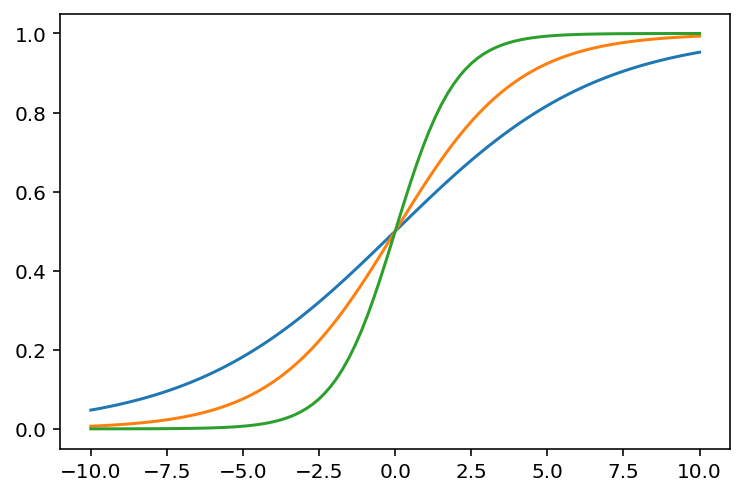

In [15]:
# 가중치 이동
# W(a)값이 작을 때 -> 클 때
def logreg(z):
    return 1/ (1 + np.exp(-z))

W_list = [0.3, 0.5, 1]
b_list = [0]
xx = np.linspace(-10, 10, 100)
for W in W_list:
    for b in b_list:
        yy = logreg(W*xx + b)
        plt.plot(xx, yy)

In [16]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [17]:
# X, y 데이터 준비
X, y = make_forge()

C:\Users\injoo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


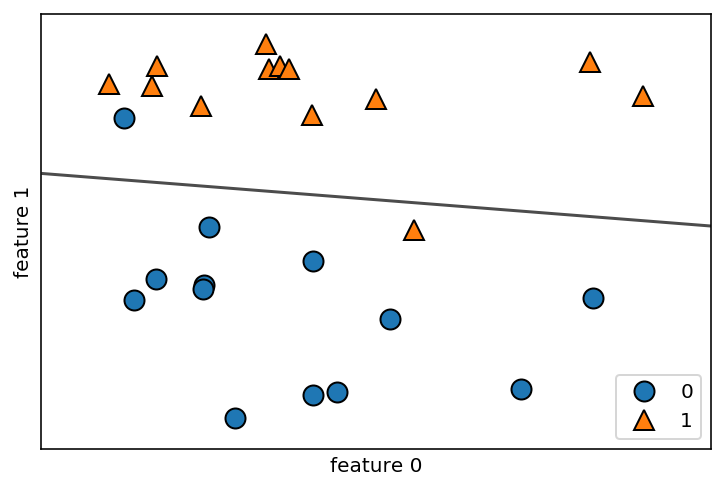

In [21]:
# C 값을 변경해가면서 결정경계가 어떻게 변하는지 확인
#model = LogisticRegression(C=0.1).fit(X, y)
model = LogisticRegression(C=0.1).fit(X, y)


mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

plt.xlabel('feature 0')  # 특성0
plt.ylabel('feature 1')  # 특성1

plt.legend(loc=4)
plt.show()

In [22]:
# C값이 커지면 규제가 감소 -> 과대적합 감소
# C가 크면 최대한 훈련 세트에 맞추려하고 C가 작으면 w가 0에 가까워지도록 만듬
# C가 크면 개개의 데이터

In [23]:
#Decision Tree(결정트리) 과대적합 제어
#사전가지치기 (pre-prenning)
#트리의 최대 깊이나 리프노드의 최대 개수를 제어
#노드가 분할하기 위한 데이터 포인트의 최소 개수를 지정

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
pred=  model.predict(X_test)
print("Score: {}".format(model.score(X_train, y_train)))
print("정확도: {}".format(accuracy_score(y_test, pred)))

Score: 1.0
정확도: 0.9333333333333333


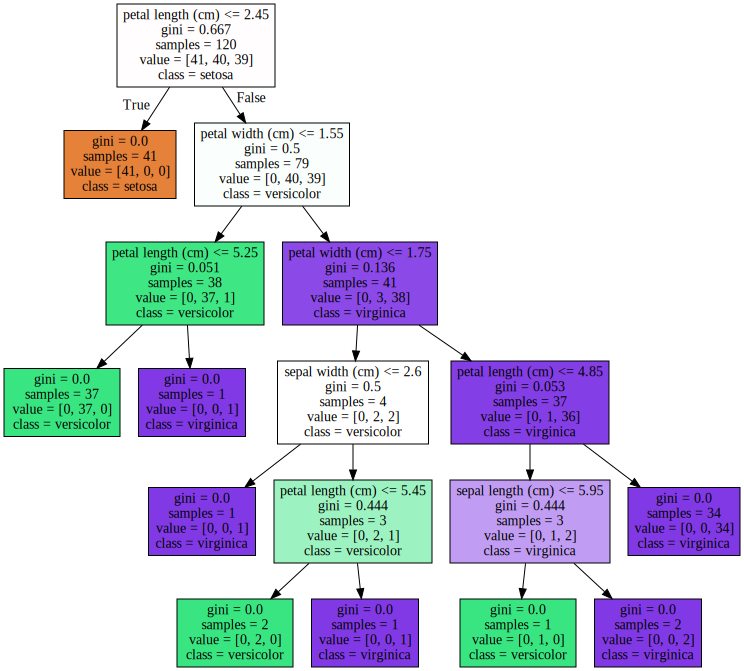

In [28]:
from sklearn.tree import export_graphviz
import graphviz
# export_graphviz() 를 호출하여 out_file 파라메터의 "tree.dot" 파일을 생성
export_graphviz(model, out_file="tree.dot", 
                class_names=iris.target_names, 
                feature_names=iris.feature_names,
                impurity=True, filled=True)

# "tree.dot" 파일을 graphviz 가 읽어서 주피터 노트북에 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importances:
[0.017 0.008 0.555 0.42 ]
sepal length (cm) : 0.017
sepal width (cm) : 0.008
petal length (cm) : 0.555
petal width (cm) : 0.420


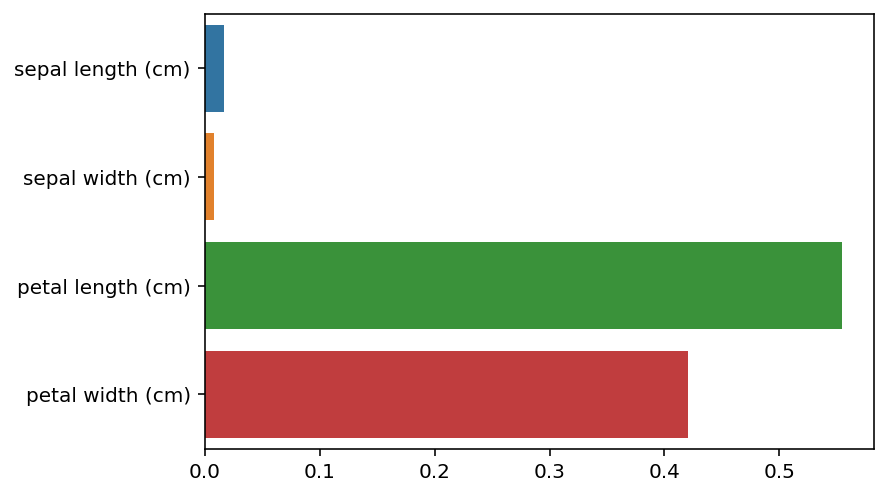

In [29]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(model.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))


#feature importance를 column 별로 시각화하기
sns.barplot(x=model.feature_importances_, y=iris.feature_names)

In [30]:
import numpy as np

#Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding = 0.15
    res = 0.01
    
    #데이터 세트의 x, y의 최대 값과 최소 값
    x_min, x_max = X[:0].min(), X[:0].max()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data = pd.read_excel(r'C:\Apps\temp\titanic.xls')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [34]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


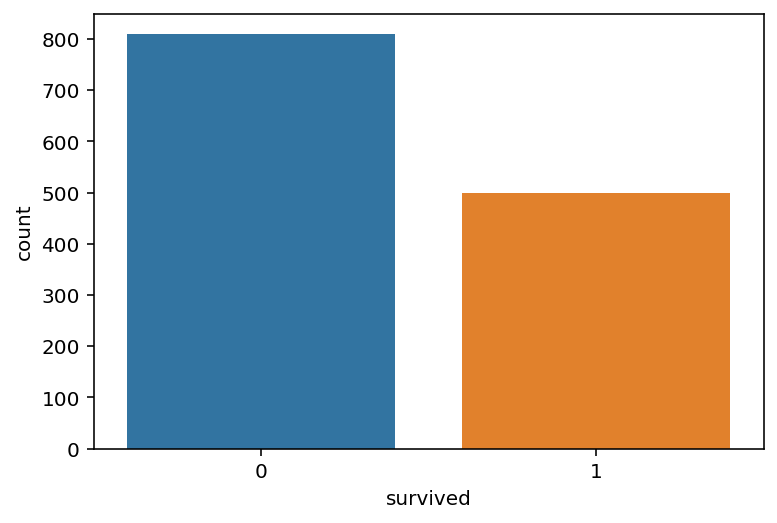

In [35]:
import seaborn as sns

sns.countplot('survived', data=titanic_data)

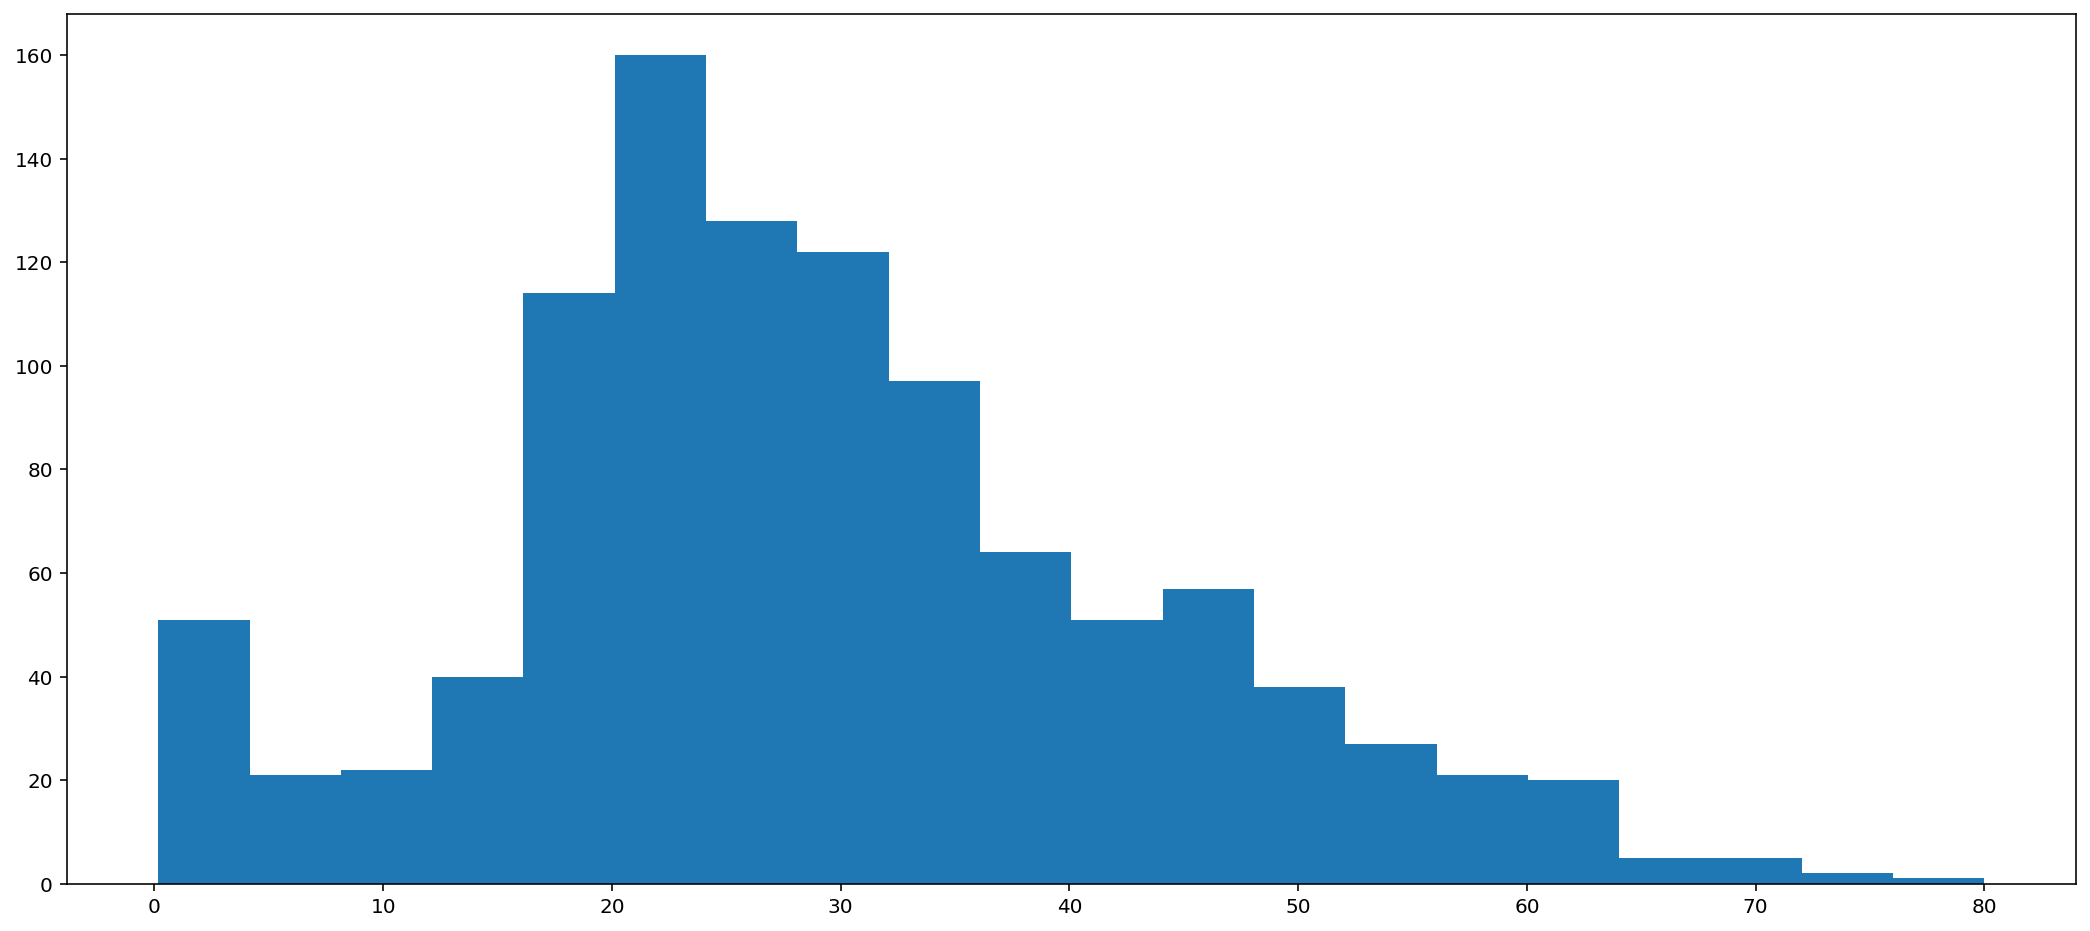

In [38]:
# 나이 분포
titanic_data['age'].hist(bins=20, figsize=(18,8), grid=False);

In [39]:
titanic_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


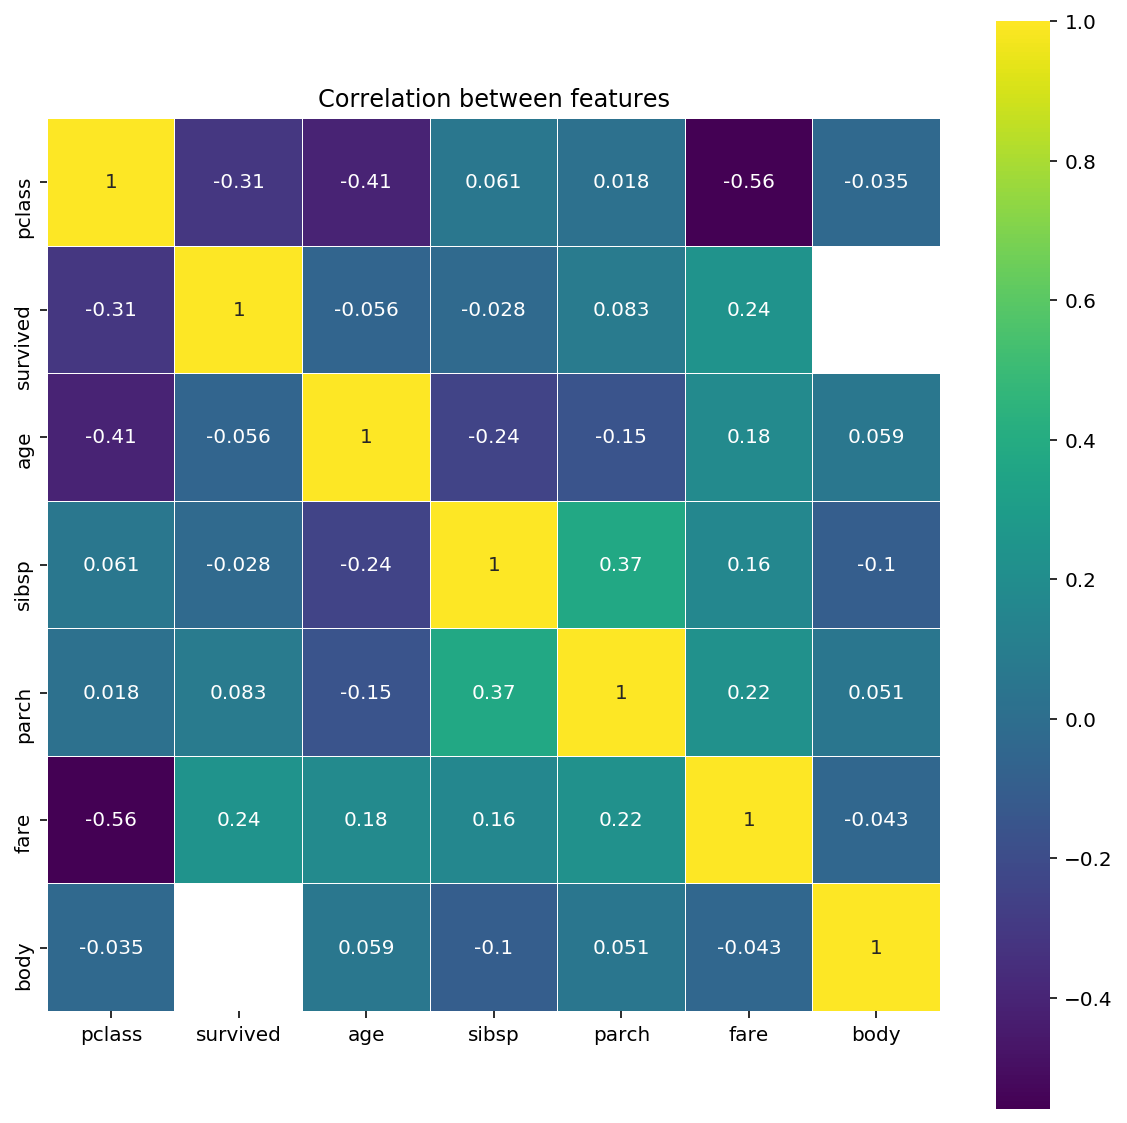

In [41]:
#특성의 상관관계 분석
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_data.corr(), linewidths = 0.01, square=True, 
           annot=True, cmap = plt.cm.viridis, linecolor = "white")
plt.title('Correlation between features')
plt.show()